In [1]:
import os
import sys
#append to PYTHONPATH the cwd's parent directory
sys.path.append(os.path.abspath(os.path.join(os.getcwd(),".."))) 

In [2]:
import numpy as np
import cv2 as cv2
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os.path as path
import glob
import src.watershed_extraction as rinocell

import rinoutils
import plotutils


# Iterazione 2 esperimento #1


In [3]:
#DATASET_PATH = "/home/prf/Desktop/UNI/TESI/Datasets/Dataset Iterazione 2/Immagini 1000X vetrini Citospin"
#DATASET_PATH = "/home/prf//Desktop/UNI/TESI/Datasets/Dataset iterazione 1/dataset_050718/1011210006"
DATASET_PATH = "/home/prf/Desktop/UNI/TESI/Datasets/Dataset iterazione 1/dataset_240718/palella"
rinoutils.display_dataset_metadata(DATASET_PATH, rinoutils.markdown_table_formatter)

**N report is available!** (metainfo.json file doesn't exist)

### Load dataset

scegliere un immagine da analizzare tra quelle presenti nel dataset indicando l'indice nella lista:

Chosed image:
/home/prf/Desktop/UNI/TESI/Datasets/Dataset iterazione 1/dataset_240718/palella/img-0040.png


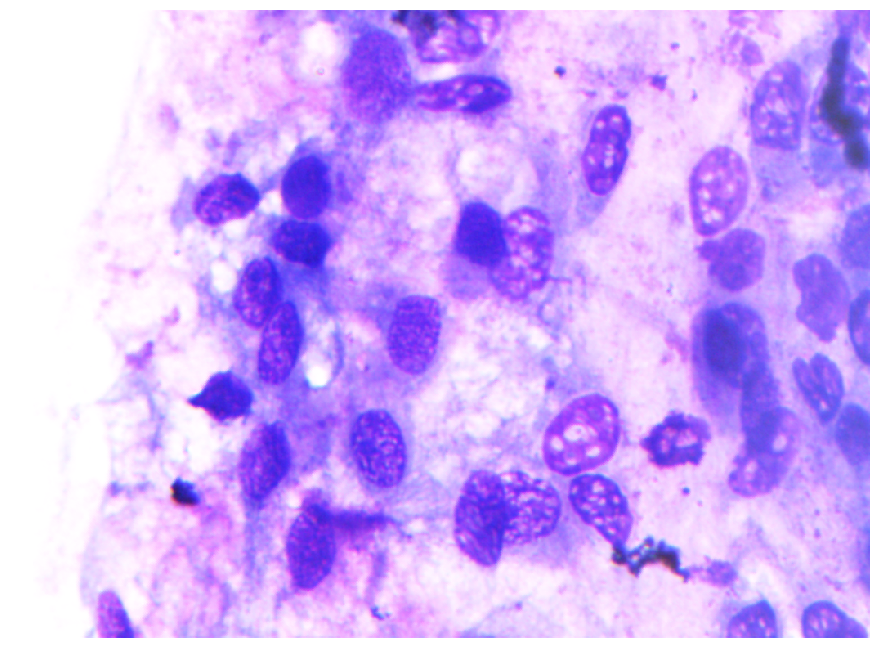

In [4]:
imgIndex = 12

#Select image
imgList = glob.glob(path.join(DATASET_PATH,"*JPG"))
imgList.extend( glob.glob(path.join(DATASET_PATH,"*jpeg")))
imgList.extend( glob.glob(path.join(DATASET_PATH,"*png")))

imgPath = imgList[imgIndex]
print("Chosed image:\n{}".format(imgPath))

#Show image
img = cv2.imread(imgPath)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

fig,ax = plt.subplots(figsize=(15,15))
ax.set_axis_off()
ax.imshow(img)
plt.show()

### Cell segmentation

In [5]:
labels = rinocell.detections_cells(img)


In [19]:
ax.patches = []
ax.clear()
#rinoutils.add_circle_annotations(labels, ax)
#rinoutils.add_box_annotations(labels,ax)
plotutils.add_regions_annotations(labels,ax, plotutils.circle_annotator, color="#000000", linewidth=1., linestyle="-.", fill=False)
plotutils.add_regions_annotations(labels,ax, plotutils.label_annotator, color="#000000")
fig

ValueError: Image size of 794298x560805 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x1080 with 1 Axes>

## Analisi


Come si può notare nell'immagine prodotta molte cellule non sono state rilevate (false negative). Altre invece sono state rilevate ma non sembrano essere cellule (false positive)